In [3]:
#-*- coding: utf-8 -*-
"""
Created on 2021

@author: Administrator
"""

#%%

# =============================================================================
# =============================================================================
# # 문제 01 유형(DataSet_01.csv 이용)
#
# 구분자 : comma(“,”), 4,572 Rows, 5 Columns, UTF-8 인코딩
#
# 글로벌 전자제품 제조회사에서 효과적인 마케팅 방법을 찾기
# 위해서 채널별 마케팅 예산과 매출금액과의 관계를 분석하고자
# 한다.
# 컬 럼 / 정 의  /   Type
# TV   /     TV 마케팅 예산 (억원)  /   Double
# Radio / 라디오 마케팅 예산 (억원)  /   Double
# Social_Media / 소셜미디어 마케팅 예산 (억원)  / Double
# Influencer / 인플루언서 마케팅
# (인플루언서의 영향력 크기에 따라 Mega / Macro / Micro /
# Nano) / String

# SALES / 매출액 / Double
# =============================================================================
# =============================================================================

import pandas as pd

data1 = pd.read_csv('./Dataset/Dataset_01.csv')

print(data1.info())
print()
print(data1.columns)

#%%

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB
None

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')


In [2]:
# =============================================================================
# 1. 데이터 세트 내에 총 결측값의 개수는 몇 개인가? (답안 예시) 23
# =============================================================================

data1.isna().sum().sum()

# 답 : 26

26

In [6]:
# [참고] : 결측치가 포함된 행의 수
data1.isna().any(axis=1).sum()

26

In [15]:
# ============================================================================
# 2. TV, Radio, Social Media 등 세 가지 다른 마케팅 채널의 예산과 매출액과의 상관분석을
# 통하여 각 채널이 매출에 어느 정도 연관이 있는지 알아보고자 한다.
# - 매출액과 가장 강한 상관관계를 가지고 있는 채널의 상관계수를 소수점 5번째
# 자리에서 반올림하여 소수점 넷째 자리까지 기술하시오. (답안 예시) 0.1234
# =============================================================================

var_list = ['TV','Radio','Social_Media','Sales']

q1_2 = data1.corr().drop('Sales')['Sales'].abs()

# 상관계수 소수점 5번째자리에서 반올림하여 소수점 넷째 자리까지 기술
print(round(q1_2.max(), 4))

#  답 : 0.9995

0.9995


In [17]:
print(q1_2.max()) # 최대값
print(q1_2.idxmax())  # 인덱스명
print(q1_2.argmax())  # 위치번호
print(q1_2.nlargest(1))  # 결과 인덱스명

0.999497444941335
TV
0
TV    0.999497
Name: Sales, dtype: float64


In [21]:
# =============================================================================
# 3. 매출액을 종속변수, TV, Radio, Social Media의 예산을 독립변수로 하여 회귀분석을
# 수행하였을 때, 세 개의 독립변수의 회귀계수를 큰 것에서부터 작은 것 순으로
# 기술하시오.
# - 분석 시 결측치가 포함된 행은 제거한 후 진행하며, 회귀계수는 소수점 넷째 자리
# 이하는 버리고 소수점 셋째 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

var_list = ['TV','Radio','Social_Media']

# 결측치가 포함된 행 제거
q1_3 = data1.dropna()

# 회귀계수
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from statsmodels.api import OLS, add_constant

# LinearRegression
lm = LinearRegression(fit_intercept=True)
lm.fit(q1_3[var_list], q1_3['Sales'])

#dir(lm)

print(lm.intercept_)  # 상수항/절편, -0.1339630519422883
print()
print(lm.coef_)  # 회귀계수. [ 3.56256963 -0.00397039  0.00496402]

# 답 : 3.562, 0.004, -0.003

-0.1339630519422883

[ 3.56256963 -0.00397039  0.00496402]


### scikit-learn 패키지 사용한 선형 회귀분석
1. `LinearRegression` 클래스 객체 생성
    ```
    model = LinearRegression(fit_intercept=True)
    ```
    `fit_intercept` 인수는 모형에 상수항이 있는가 없는가를 결정하는 인수 (있으면 True)
    
2. `fit` 메서드로 모형 추정. 상수항 결합을 자동으로 해주므로 사용자가 직접 `add_constant` 등의
    명령을 써서 상수항 결합을 할 필요는 없다.
    ```
    model = model.fit(X,y)
    ```
    회귀분석을 하고 나면 모형 객체는 다음과 같은 속성을 가지게 됨
    - `coef_` : 추정된 가중치 벡터
    - `intercept_` : 추정된 상수항
    
3. `predict` 메서드로 새로운 입력 데이터에 대한 출력 데이터 예측
    ```
    y_new = model.predict(x_new)
    ```

In [25]:
# 식 제작 : 'Sales~TV+Radio+Social_Media'
form1 = 'Sales~' + '+'.join(var_list)
print(form1)

# ols
q1_3_out = ols(form1, q1_3).fit()

#print(dir(q1_3_out))

q1_3_out.summary()

Sales~TV+Radio+Social_Media


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        16:53:43   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
q1_3_out.params.drop('Intercept').sort_values(ascending=False).values

# 답 : [ 3.56256963,  0.00496402, -0.00397039]

array([ 3.56256963,  0.00496402, -0.00397039])

In [29]:
# [참고] 유의미한 변수 찾기
q1_3_out.pvalues[q1_3_out.pvalues < 0.05].index

# TV

Index(['TV'], dtype='object')

In [31]:
# 이상치 확인
outlier_score=q1_3_out.outlier_test()
q1_3[outlier_score['bonf(p)'] < 0.05]  # 이상치 제외 데이터 획득

,TV,Radio,Social_Media,Influencer,Sales


In [33]:
q1_3_out2=OLS(q1_3['Sales'], add_constant(q1_3[var_list])).fit()
q1_3_out2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.505e+06
Date:                Tue, 25 Oct 2022   Prob (F-statistic):               0.00
Time:                        17:41:27   Log-Likelihood:                -11366.
No. Observations:                4546   AIC:                         2.274e+04
Df Residuals:                    4542   BIC:                         2.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1340      0.103     -1.303      0.193      -0.336       0.068
TV               3.5626      0.003   1051.118      0.000       3.556       3.569
Radio           -0.0040      0.010     -0.406      0.685      -0.023       0.015
Social_Media     0.0050      0.025      0.199      0.842      -0.044       0.054
==============================================================================
Omnibus:                        0.056   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.972   Jarque-Bera (JB):                0.034
Skew:                          -0.001   Prob(JB):                        0.983
Kurtosis:                       3.013   Cond. No.                         149.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### statsmodels 패키지를 사용한 선형 회귀 분석

1. 독립변수와 종속변수가 모두 포함된 데이터프레임 생성. 상수항 결함은 하지 않아도 됨

2. OLS 클래스 객체 생성
   ```
   model = OLS.from_formul(formul,data=df)
   ```
   또는
   독립변수만 있는 데이터프레임 dfs와 종속변수만 있는 데이터프레임 dfy를 인수로 넣어서 만듦
   이 때는 독립변수만 있는 데이터프레임 dfx가 상수항을 가지고 있어야 함
   ```
   model = OLS(dfy, dfx)
   ```
3. `fit` 메서드로 모형 추정. scikit-learn 패키지와 달리 추정 결과는 
    별도의 RegressionResults 클래스 객체로 출력
    ```
    result = model.fit()
    변수 = ols(식, 데이터).fit()
    ```
    식 : 'y~x1+c(x2)+x3-1'
    - -1의 의미 : 상수항 미포함
    - C() : 범주형 선언 -> 더미변수로 자동 변환 생성
    - 결측치는 자동 제외
    - 범주형 변수는 자동으로 더미변수 생성
    - 강제로 생성하고자 할 경우 변수 앞에 C() 사용
    
4. `RegressionResults` 클래스 객체는 결과 리포트용 `summary()`메서드와 예측을 위한 `prediction`메서드를 제공
    ```
    result.summary()
    y_new = result.predict(x_new)
    ```
    이 때, 예측을 위한 데이터는 추정시와 동일하게 상수항 결합을 해 주어야 함

### 범주형 변수 삽입 시

In [55]:
form2 = 'Sales~' + '+'.join(data1.columns.drop('Sales'))
# form2
# 'Sales~TV+Radio+Social_Media+Influencer'

lm3 = ols(form2, q1_3).fit()

lm3.summary()

lm3.predict(q1_3.drop(columns=['Sales']))

0        56.896653
1        46.196295
2       145.924369
3       295.514743
4        53.251588
           ...    
4567     92.452216
4568    252.713557
4569    156.538029
4570    252.778919
4571    149.427658
Length: 4546, dtype: float64

In [59]:
anova1 = ols('Sales~Influencer', q1_3).fit()

from statsmodels.stats.anova import anova_lm

anova_lm(anova1)

,df,sum_sq,mean_sq,F,PR(>F)
Influencer,3.0,2.081064e+04,6936.879515,0.801596,0.492813
Residual,4542.0,3.930570e+07,8653.830120,NaN,NaN


In [60]:
# 다중비교, 사후분석
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print(pairwise_tukeyhsd(q1_3['Sales'], q1_3['Influencer']))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
 Macro   Mega  -5.6532 0.4709 -15.7039  4.3974  False
 Macro  Micro  -4.4878 0.6606  -14.547  5.5715  False
 Macro   Nano  -4.3573 0.6835 -14.4471  5.7324  False
  Mega  Micro   1.1655 0.9906  -8.8047 11.1356  False
  Mega   Nano   1.2959 0.9873   -8.705 11.2968  False
 Micro   Nano   0.1305    1.0  -9.8791   10.14  False
-----------------------------------------------------


In [63]:
# [참고]
print(type(q1_3['TV'].values))
print(q1_3['TV'].values.reshape(-1,1).ndim)
print(q1_3[['TV']].ndim)
print(q1_3['TV'].ndim)
# nparray.ndim : 배열의 차원 수 or 배열의 축 수

<class 'numpy.ndarray'>
2
2
1


## 문제 02

In [36]:
# =============================================================================
# =============================================================================
# # 문제 02 유형(DataSet_02.csv 이용)
# 구분자 : comma(“,”), 200 Rows, 6 Columns, UTF-8 인코딩

# 환자의 상태와 그에 따라 처방된 약에 대한 정보를 분석하고자한다
#
# 컬 럼 / 정 의  / Type
# Age  / 연령 / Integer
# Sex / 성별 / String
# BP / 혈압 레벨 / String
# Cholesterol / 콜레스테롤 레벨 /  String
# Na_to_k / 혈액 내 칼륨에 대비한 나트륨 비율 / Double
# Drug / Drug Type / String
# =============================================================================
# =============================================================================

import pandas as pd

data2 = pd.read_csv('./DataSet/DataSet_02.csv')
print(data2)
print()
print(data2.info())
print()
print(data2.columns)

     Age Sex      BP Cholesterol  Na_to_K   Drug
0     23   F    HIGH        HIGH   25.355  DrugY
1     47   M     LOW        HIGH   13.093  drugC
2     47   M     LOW        HIGH   10.114  drugC
3     28   F  NORMAL        HIGH    7.798  drugX
4     61   F     LOW        HIGH   18.043  DrugY
..   ...  ..     ...         ...      ...    ...
195   56   F     LOW        HIGH   11.567  drugC
196   16   M     LOW        HIGH   12.006  drugC
197   52   M  NORMAL        HIGH    9.894  drugX
198   23   M  NORMAL      NORMAL   14.020  drugX
199   40   F     LOW      NORMAL   11.349  drugX

[200 rows x 6 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null 

In [39]:
# =============================================================================
# 1.해당 데이터에 대한 EDA를 수행하고, 여성으로 혈압이 High, Cholesterol이 Normal인
# 환자의 전체에 대비한 비율이 얼마인지 소수점 네 번째 자리에서 반올림하여 소수점 셋째
# 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

q2_1 = data2[['Sex','BP','Cholesterol']].value_counts(normalize=True)
q2_1[('F','HIGH','NORMAL')]

# 답 : 0.105

0.105

In [52]:
# =============================================================================
# 2. Age, Sex, BP, Cholesterol 및 Na_to_k 값이 Drug 타입에 영향을 미치는지 확인하기
# 위하여 아래와 같이 데이터를 변환하고 분석을 수행하시오.
# - Age_gr 컬럼을 만들고, Age가 20 미만은 ‘10’, 20부터 30 미만은 ‘20’, 30부터 40 미만은
# ‘30’, 40부터 50 미만은 ‘40’, 50부터 60 미만은 ‘50’, 60이상은 ‘60’으로 변환하시오.
# - Na_K_gr 컬럼을 만들고 Na_to_k 값이 10이하는 ‘Lv1’, 20이하는 ‘Lv2’, 30이하는 ‘Lv3’, 30
# 초과는 ‘Lv4’로 변환하시오.
# - Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정을
# 수행하시오.
# - 검정 수행 결과, Drug 타입과 연관성이 있는 변수는 몇 개인가? 연관성이 있는 변수
# 가운데 가장 큰 p-value를 찾아 소수점 여섯 번째 자리 이하는 버리고 소수점 다섯
# 번째 자리까지 기술하시오.
# (답안 예시) 3, 1.23456
# =============================================================================
import numpy as np

q2_2 = data2.copy()

# 1. Age_gr 컬럼
q2_2['Age_gr'] = np.where(q2_2['Age'] < 20, 10,
                    np.where(q2_2['Age'] < 30, 20,
                        np.where(q2_2['Age'] < 40, 30,
                            np.where(q2_2['Age'] < 50, 40,
                                np.where(q2_2['Age'] < 60, 50, 60)))))

# 2. Na_K_gr 컬럼
q2_2['Na_K_gr'] = np.where(q2_2['Na_to_K'] < 10, 'Lv1',
                    np.where(q2_2['Na_to_K'] < 20, 'Lv2',
                        np.where(q2_2['Na_to_K'] < 30, 'Lv3', 'Lv4')))

# 3. Sex, BP, Cholesterol, Age_gr, Na_K_gr이 Drug 변수와 영향이 있는지 독립성 검정
# (= 카이스퀘어 검정)
from scipy.stats import chi2_contingency

var_list = ['Sex', 'BP', 'Cholesterol', 'Age_gr', 'Na_K_gr']

# 반복문으로 구성
q2_2_out = []
for i in var_list:
    # 빈도 생성
    tab = pd.crosstab(index=q2_2[i], columns=q2_2['Drug'])
    # 카이스퀘어 검정
    chi_test = chi2_contingency(tab)
    # p-value만
    pvalue = chi_test[1]
    # 리스트 추가
    q2_2_out.append([i, pvalue])

# Drug 타입과 연관성이 있는 변수는 몇 개
q2_2_out = pd.DataFrame(q2_2_out, columns=['var','pvalue'])
q2_2_out2 = q2_2_out[q2_2_out.pvalue < 0.05]
len(q2_2_out2)  # 4

# 가운데 가장 큰 p-value
q2_2_out2.pvalue.max()  # 0.0007010113024729462

# 답 : 4, 0.00070

0.0007010113024729462

### 카이제곱 독립검정

카이제곱검정 : 어떤 범주형 확률변수 X가 다른 범주형 확류변수 Y와 독립인지 상관관계를 가지는지 검정
- 카이제곱검정을 독립을 확인하는 데 사용하면 카이제곱 독립검정

- scipy의 `sci2_contingency()`
- X의 값에 따른 각각의 Y분포가 2차원 표(contingency table)의 형태로 주어지고
- 독립인 경우의 분포와 실제 y표본분포이 차이를 검정통계량으로 계산
- 이 값이 충분히 크면 X와 Y느 상관관계가 있다.
- 첫번째 값이 검정통계량, 두번째 값이 유의확률

|--- Na_to_K <= 14.829
|   |--- BP_cd <= 1.500
|   |   |--- BP_cd <= 0.500
|   |   |   |--- Ch_cd <= 0.500
|   |   |   |   |--- class: drugX
|   |   |   |--- Ch_cd >  0.500
|   |   |   |   |--- class: drugC
|   |   |--- BP_cd >  0.500
|   |   |   |--- class: drugX
|   |--- BP_cd >  1.500
|   |   |--- Age <= 50.500
|   |   |   |--- class: drugA
|   |   |--- Age >  50.500
|   |   |   |--- class: drugB
|--- Na_to_K >  14.829
|   |--- class: DrugY



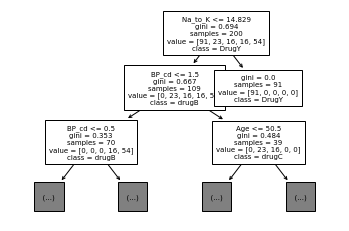

In [66]:
# =============================================================================
# 3.Sex, BP, Cholesterol 등 세 개의 변수를 다음과 같이 변환하고 의사결정나무를 이용한
# 분석을 수행하시오.
# - Sex는 M을 0, F를 1로 변환하여 Sex_cd 변수 생성
# - BP는 LOW는 0, NORMAL은 1 그리고 HIGH는 2로 변환하여 BP_cd 변수 생성
# - Cholesterol은 NORMAL은 0, HIGH는 1로 변환하여 Ch_cd 생성
# - Age, Na_to_k, Sex_cd, BP_cd, Ch_cd를 Feature로, Drug을 Label로 하여 의사결정나무를
# 수행하고 Root Node의 split feature와 split value를 기술하시오.
# 이 때 split value는 소수점 셋째 자리까지 반올림하여 기술하시오. (답안 예시) Age,
# 12.345
# =============================================================================

q2_3 = data2.copy()

# 변수 생성
q2_3['Sex_cd'] = np.where(q2_3['Sex'] == 'M', 0, 1)
q2_3['BP_cd'] = np.where(q2_3['BP'] == 'LOW', 0,
                    np.where(q2_3['BP'] == 'NORMAL', 1, 2))
q2_3['Ch_cd'] = np.where(q2_3['Cholesterol'] == 'NORMAL', 0, 1)

# 의사결정나무

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text

var_list = ['Age','Na_to_K','Sex_cd','BP_cd','Ch_cd']

dt = DecisionTreeClassifier().fit(q2_3[var_list], q2_3['Drug'])

dt_plot = plot_tree(dt, feature_names=var_list,
                    class_names = q2_3['Drug'].unique(),
                    max_depth = 2,
                    fontsize = 7)

# dt_plot

print(export_text(dt, feature_names=var_list, decimals=3))

# Root Node의 split feature와 split value
# 답 : Na_to_K, 14.829

In [67]:
# [참고]

from sklearn.feature_selection import RFE

rfe1 = RFE(DecisionTreeClassifier(), n_features_to_select=1).fit(q2_3[var_list], q2_3['Drug'])
rfe1.ranking_

# var_list = ['Age','Na_to_K','Sex_cd','BP_cd','Ch_cd']
# [3, 1, 5, 2, 4]
# >> 'Sex_cd', 'Age', 'Ch_cd', 'Na_to_K', 'BP_cd'

array([3, 1, 5, 2, 4])

Recursive feature elimination (rfe)
- 전체 feature에 대해 훈련 후 중요하지 않은 feature 들을 제거하면서 원하는 개수의 feature 수만 남기도록 하는 방법

1. 클래스 선언
2. fit
3. transform

Parameter
- estimator : feature importance가 계산 가능한 모델
- n_features_to_select : 남겨질 중요한 feature의 수를 선언하며 지정되지 않을 경우 원래 feature의 절반이 선택
- step : 매 스텝마다 제거될 feature 수 의미
    
Attributes
- estimator_ : 선택된 feature들로만 훈련된 estimator
- n_features_ : 선택된 feature의 개수
- ranking_ : 각 feature의 순위이며 선택된 feature는 1이 됨
- support_ : 선택된 feature를 가리키는 마스크를 리턴

## 03

In [68]:
# =============================================================================
# =============================================================================
# # 문제 03 유형(DataSet_03.csv 이용)
#
# 구분자 : comma(“,”), 5,001 Rows, 8 Columns, UTF-8 인코딩
# 안경 체인을 운영하고 있는 한 회사에서 고객 사진을 바탕으로 안경의 사이즈를
# 맞춤 제작하는 비즈니스를 기획하고 있다. 우선 데이터만으로 고객의 성별을
# 파악하는 것이 가능할 지를 연구하고자 한다.
#
# 컬 럼 / 정 의 / Type
# long_hair / 머리카락 길이 (0 – 길지 않은 경우 / 1 – 긴
# 경우) / Integer
# forehead_width_cm / 이마의 폭 (cm) / Double
# forehead_height_cm / 이마의 높이 (cm) / Double
# nose_wide / 코의 넓이 (0 – 넓지 않은 경우 / 1 – 넓은 경우) / Integer
# nose_long / 코의 길이 (0 – 길지 않은 경우 / 1 – 긴 경우) / Integer
# lips_thin / 입술이 얇은지 여부 0 – 얇지 않은 경우 / 1 –
# 얇은 경우) / Integer
# distance_nose_to_lip_long / 인중의 길이(0 – 인중이 짧은 경우 / 1 – 인중이
# 긴 경우) / Integer
# gender / 성별 (Female / Male) / String
# =============================================================================
# =============================================================================

import pandas as pd

data3 = pd.read_csv('./DataSet/DataSet_03.csv')

print(data3.info())
print()
print(data3.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  5001 non-null   int64  
 1   forehead_width_cm          5001 non-null   float64
 2   forehead_height_cm         5001 non-null   float64
 3   nose_wide                  5001 non-null   int64  
 4   nose_long                  5001 non-null   int64  
 5   lips_thin                  5001 non-null   int64  
 6   distance_nose_to_lip_long  5001 non-null   int64  
 7   gender                     5001 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 312.7+ KB
None

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')


In [69]:
# =============================================================================
# 1.이마의 폭(forehead_width_cm)과 높이(forehead_height_cm) 사이의
# 비율(forehead_ratio)에 대해서 평균으로부터 3 표준편차 밖의 경우를 이상치로
# 정의할 때, 이상치에 해당하는 데이터는 몇 개인가? (답안 예시) 10
# =============================================================================

q3_1 = data3.copy()

# 비율 변수 생성
q3_1['forehead_ratio'] = q3_1['forehead_width_cm'] / q3_1['forehead_height_cm']

# 비율 변수에 대한 평균, 표준편차
xbar = q3_1['forehead_ratio'].mean()
std = q3_1['forehead_ratio'].std()

# 평균 대비 3 표준편차 범위 구하기
UB = xbar + (std*3)
DB = xbar - (std*3)

# 이상치 정의
((q3_1['forehead_ratio'] > UB ) | (q3_1['forehead_ratio'] < DB)).sum()

# 답 : 3

3

In [73]:
# =============================================================================
# 2.성별에 따라 forehead_ratio 평균에 차이가 있는지 적절한 통계 검정을 수행하시오.
# - 검정은 이분산을 가정하고 수행한다.
# - 검정통계량의 추정치는 절대값을 취한 후 소수점 셋째 자리까지 반올림하여
# 기술하시오.
# - 신뢰수준 99%에서 양측 검정을 수행하고 결과는 귀무가설 기각의 경우 Y로, 그렇지
# 않을 경우 N으로 답하시오. (답안 예시) 1.234, Y
# =============================================================================

# 1. 성별에 따른 forehead_ratio 평균
q3_2m = q3_1[q3_1['gender'] == 'Male']['forehead_ratio']
q3_2f = q3_1[q3_1['gender'] == 'Female']['forehead_ratio']

# 2. 이분산 검정
from scipy.stats import ttest_ind
q3_2ttest_out = ttest_ind(q3_2m, q3_2f, equal_var = False)
# q3_2ttest_out 
# (statistic=2.9994984197511543, pvalue=0.0027186702390657176)

# 3. 검정 통계량 추정치
print(round(abs(q3_2ttest_out.statistic), 3))
# 검정 통계량 추정치 : 2.999

# 4. 신뢰 수준 99%에서 양측 검정
q3_2ttest_out.pvalue < 0.01  # True

# 답 : 2.999, Y


2.999


True

In [77]:
# =============================================================================
# 3.주어진 데이터를 사용하여 성별을 구분할 수 있는지 로지스틱 회귀분석을 적용하여
# 알아 보고자 한다.
# - 데이터를 7대 3으로 나누어 각각 Train과 Test set로 사용한다. 이 때 seed는 123으로
# 한다.
# - 원 데이터에 있는 7개의 변수만 Feature로 사용하고 gender를 label로 사용한다.
# (forehead_ratio는 사용하지 않음)
# - 로지스틱 회귀분석 예측 함수와 Test dataset를 사용하여 예측을 수행하고 정확도를
# 평가한다. 이 때 임계값은 0.5를 사용한다.
# - Male의 Precision 값을 소수점 둘째 자리까지 반올림하여 기술하시오. (답안 예시)
# 0.12
#
#
# (참고)
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# train_test_split 의 random_state = 123
# =============================================================================

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# 1. 데이터를 7대 3으로 나누어 각각 Train과 Test set로 사용한다. 이 때 seed는 123
train, test = train_test_split(data3, test_size=0.3, random_state = 123)

# 2. 원 데이터에 있는 7개의 변수만 Feature로 사용하고 gender를 label
var_list = train.columns.drop('gender')

# 3. 로지스틱 회귀분석
# 학습
logit = LogisticRegression().fit(train[var_list], train['gender'])

logit.coef_
# [[-0.19523081,  0.73711264,  0.9901466 ,  3.65906586,  3.55063906,
#         3.35220836,  3.62923323]]

# 4. 로지스틱 회귀분석 예측 함수와 Test dataset를 사용하여 예측을 수행하고 정확도를
# 평가한다. 이 때 임계값은 0.5를 사용한다.
# 예측
q3_3pred = logit.predict(test[var_list])
q3_3pred_pr = logit.predict_proba(test[var_list])

# print(q3_3pred)
# print(q3_3pred_pr)

# np.where(q3_3pred_pr[:1] >= 0.7, 'Male', 'Female')

# 성능 평가
from sklearn.metrics import classification_report, precision_score

print(classification_report(test['gender'], q3_3pred))
#              precision    recall  f1-score   support
#
#      Female       0.97      0.96      0.96       743
#        Male       0.96      0.97      0.97       758
#
#    accuracy                           0.97      1501
#   macro avg       0.97      0.97      0.97      1501
#weighted avg       0.97      0.97      0.97      1501

#  Male의 Precision 값을 소수점 둘째 자리까지 반올림
print(precision_score(test['gender'], q3_3pred, pos_label='Male'))
# 답 : 0.96

              precision    recall  f1-score   support

      Female       0.97      0.96      0.96       743
        Male       0.96      0.97      0.97       758

    accuracy                           0.97      1501
   macro avg       0.97      0.97      0.97      1501
weighted avg       0.97      0.97      0.97      1501

0.9596354166666666


### scikit-learn 패키지 사용 로지스틱 회귀분석

1. `LogisticRegression` 클래스 객체 생성

    `from sklearn.linear_model import LogisticRegression`
    ```
    model = LogisticRegression()
    ```
    
2. `fit` 메서드로 모형 추정. 
    ```
    model.fit(features, labels)
    ```
    - 계수 : `model.coef_`
    - 절편 : `model.intercpet_`
        
3. `predict` 메서드로 새로운 속성들을 넣었을 때 그 레이블에 속하는지 예측 (1 또는 0으로 벡터 반환)
    ```
    model.preidct(features)
    ```
    분류 결과가 아니라, 해당 레이블로 분류될 확률 값을 알고 싶으면 `predict_proba()` (확률 반환)
    ```
    model.predict_proba(features)
    ```

## 04

In [80]:
# =============================================================================
# =============================================================================
# # 문제 04 유형(DataSet_04.csv 이용)
#
#구분자 : comma(“,”), 6,718 Rows, 4 Columns, UTF-8 인코딩

# 한국인의 식생활 변화가 건강에 미치는 영향을 분석하기에 앞서 육류
# 소비량에 대한 분석을 하려고 한다. 확보한 데이터는 세계 각국의 1인당
# 육류 소비량 데이터로 아래와 같은 내용을 담고 있다.

# 컬 럼 / 정 의 / Type
# LOCATION / 국가명 / String
# SUBJECT / 육류 종류 (BEEF / PIG / POULTRY / SHEEP) / String
# TIME / 연도 (1990 ~ 2026) / Integer
# Value / 1인당 육류 소비량 (KG) / Double
# =============================================================================
# =============================================================================

# (참고)
# #1
# import pandas as pd
# import numpy as np
# #2
# from scipy.stats import ttest_rel
# #3
# from sklearn.linear_model import LinearRegression

import pandas as pd

data4 = pd.read_csv('./DataSet/DataSet_04.csv')

print(data4.columns)

Index(['LOCATION', 'SUBJECT', 'TIME', 'Value'], dtype='object')


In [90]:
# =============================================================================
# 1.한국인의 1인당 육류 소비량이 해가 갈수록 증가하는 것으로 보여 상관분석을 통하여
# 확인하려고 한다.
# - 데이터 파일로부터 한국 데이터만 추출한다. 한국은 KOR로 표기되어 있다.
# - 년도별 육류 소비량 합계를 구하여 TIME과 Value간의 상관분석을 수행하고
# 상관계수를 소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지만 기술하시오.
# (답안 예시) 0.55
# =============================================================================

# 1. 한국 데이터만 추출
q4_1 = data4[data4['LOCATION'] == 'KOR'] 

# 2. 년도별 육류 소비량 합계를 구하여 TIME과 Value간의 상관분석을 수행
q4_1out = q4_1.groupby('TIME')['Value'].sum().reset_index()

q4_1out.corr()['TIME']['Value']

# 답 : 0.96

0.9601244896033333

In [100]:
# =============================================================================
# 2. 한국 인근 국가 가운데 식생의 유사성이 상대적으로 높은 일본(JPN)과 비교하여, 연도별
# 소비량에 평균 차이가 있는지 분석하고자 한다.
# - 두 국가의 육류별 소비량을 연도기준으로 비교하는 대응표본 t 검정을 수행하시오.
# - 두 국가 간의 연도별 소비량 차이가 없는 것으로 판단할 수 있는 육류 종류를 모두
# 적으시오. (알파벳 순서) (답안 예시) BEEF, PIG, POULTRY, SHEEP
# =============================================================================

# 1. 한국, 일본 데이터 추출
q4_2 = data4[data4['LOCATION'].isin(['KOR','JPN'])]

# 2. 육류목록 추출
sub_list = q4_2.SUBJECT.unique()

# 3. 반복문 이용해서 육류 종류별 대응 t 검정
from scipy.stats import ttest_rel

q4_2out = []
for i in sub_list:
    # 육류별
    temp = q4_2[q4_2['SUBJECT'] == i]
    # pivot table 만들기
    temp2 = pd.pivot_table(temp, index='TIME', columns='LOCATION',
                  values = 'Value', aggfunc='mean').dropna()
    # ttest 수행
    ttest_out = ttest_rel(temp2['KOR'],temp2['JPN'])
    # 육류별 pvalue 리스트
    q4_2out.append([i,ttest_out.pvalue])

q4_2_out2 = pd.DataFrame(q4_2out, columns=['sub','pvalue'])

# 4. 두 국가 간의 연도별 소비량 차이가 없는 것으로 판단할 수 있는 육류 종류
# H0 : 소비량 차이가 있다
# H1 : 소비량 차이가 없다
q4_2_out2[q4_2_out2.pvalue >= 0.05]['sub']

# 답 : POULTRY

2    POULTRY
Name: sub, dtype: object

1. `ttest_ind()` : 독립표본 t 검정
2. `ttest_rel()` : 대응표본 t 검정
3. `ttest_1samp()` : 단일표본 t 검정

In [114]:
# =============================================================================
# 3.(한국만 포함한 데이터에서) Time을 독립변수로, Value를 종속변수로 하여 육류
# 종류(SUBJECT) 별로 회귀분석을 수행하였을 때, 가장 높은 결정계수를 가진 모델의
# 학습오차 중 MAPE를 반올림하여 소수점 둘째 자리까지 기술하시오. (답안 예시) 21.12
# (MAPE : Mean Absolute Percentage Error, 평균 절대 백분율 오차)
# (MAPE = Σ ( | y - y ̂ | / y ) * 100/n ))
#
# =============================================================================

# 1. 한국만 포함한 데이터
q4_3 = data4[data4['LOCATION'] == 'KOR']

# 2. 육류 종류별
sub_list = q4_3.SUBJECT.unique()

# 3. 육류 종류별 회귀분석
from sklearn.linear_model import LinearRegression

q4_3_out = []
for i in sub_list:
    # 육류별
    temp = q4_3[q4_3.SUBJECT == i]
    # 회귀분석 학습
    lm = LinearRegression().fit(temp[['TIME']], temp['Value'])
    # 회귀분석 결과
    r2 = lm.score(temp[['TIME']], temp['Value'])
    # 예측
    pred = lm.predict(temp[['TIME']])
    # (MAPE = Σ ( | y - y ̂ | / y ) * 100/n )
    mape = (abs(temp['Value'] - pred) / temp['Value']).sum() * 100 / len(temp)
    q4_3_out.append([i, r2, mape])
    
# 4. 가장 높은 결정계수를 가진 모델의 학습오차 중 MAPE를 반올림하여 소수점 둘째 자리까지
q4_3_df = pd.DataFrame(q4_3_out, columns=['sub','r2','mape'])

q4_3_df.loc[q4_3_df.r2.idxmax(), 'mape']

# 답 : 5.78

5.783357902874552

lm = linearRegression()
lm.score() : 결정 계수 $R^2$ 

## 05

In [119]:
# =============================================================================
# =============================================================================
# # 문제 05 유형(DataSet_05.csv 이용)
#
# 구분자 : comma(“,”), 8,068 Rows, 12 Columns, UTF-8 인코딩
#
# A자동차 회사는 신규 진입하는 시장에 기존 모델을 판매하기 위한 마케팅 전략을
# 세우려고 한다. 기존 시장과 고객 특성이 유사하다는 전제 하에 기존 고객을 세분화하여
# 각 그룹의 특징을 파악하고, 이를 이용하여 신규 진입 시장의 마케팅 계획을
# 수립하고자 한다. 다음은 기존 시장 고객에 대한 데이터이다.
#

# 컬 럼 / 정 의 / Type
# ID / 고유 식별자 / Double
# Age / 나이 / Double
# Age_gr / 나이 그룹 (10/20/30/40/50/60/70) / Double
# Gender / 성별 (여성 : 0 / 남성 : 1) / Double
# Work_Experience / 취업 연수 (0 ~ 14) / Double
# Family_Size / 가족 규모 (1 ~ 9) / Double
# Ever_Married / 결혼 여부 (Unknown : 0 / No : 1 / Yes : 2) / Double
# Graduated / 재학 중인지 여부 / Double
# Profession / 직업 (Unknown : 0 / Artist ~ Marketing 등 9개) / Double
# Spending_Score / 소비 점수 (Average : 0 / High : 1 / Low : 2) / Double
# Var_1 / 내용이 알려지지 않은 고객 분류 코드 (0 ~ 7) / Double
# Segmentation / 고객 세분화 결과 (A ~ D) / String
# =============================================================================
# =============================================================================


#(참고)
#1
# import pandas as pd
# #2
# from scipy.stats import chi2_contingency
# #3
# from sklearn.model_selection import train_test_split
# from sklearn import metrics
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.tree import export_graphviz
# import pydot

import pandas as pd
data5 = pd.read_csv('./DataSet/DataSet_05.csv')
data5 = pd.read_csv('./DataSet/DataSet_05.csv', na_values=['?', 'NA','', ' '])

In [122]:
# =============================================================================
# 1.위의 표에 표시된 데이터 타입에 맞도록 전처리를 수행하였을 때, 데이터 파일 내에
# 존재하는 결측값은 모두 몇 개인가? 숫자형 데이터와 문자열 데이터의 결측값을
# 모두 더하여 답하시오.
# (String 타입 변수의 경우 White Space(Blank)를 결측으로 처리한다) (답안 예시) 123
# =============================================================================

data5.isnull().sum().sum()
# 답 : 1166

1166

In [129]:
# =============================================================================
# 2.이어지는 분석을 위해 결측값을 모두 삭제한다. 그리고, 성별이 세분화(Segmentation)에
# 영향을 미치는지 독립성 검정을 수행한다. 수행 결과, p-value를 반올림하여 소수점
# 넷째 자리까지 쓰고, 귀무가설을 기각하면 Y로, 기각할 수 없으면 N으로 기술하시오.
# (답안 예시) 0.2345, N
# =============================================================================

from scipy.stats import chi2_contingency

# 1. 결측치 제거
q5_1 = data5.dropna()

# 2. 성별이 세분화(Segmentation)에 영향을 미치는지 독립성 검정을 수행 (카이스퀘어 검정)
## 빈도
q5_tab = pd.crosstab(index=q5_1.Gender, columns=q5_1.Segmentation)

## 카이스퀘어 검정
q5_2out = chi2_contingency(q5_tab)

# 3. pvalue
pvalue = round(q5_2out[1], 4)
print(f'pvalue:{pvalue}')

print(f'귀무가설 기각 : {pvalue<0.05}')

# 답 : 0.0031, Y

pvalue:0.0031
귀무가설 기각 : True


In [138]:
# =============================================================================
# 3.Segmentation 값이 A 또는 D인 데이터만 사용하여 의사결정 나무 기법으로 분류
# 정확도를
# 측정해 본다.
# - 결측치가 포함된 행은 제거한 후 진행하시오.
# - Train대 Test 7대3으로 데이터를 분리한다. (Seed = 123)
# - Train 데이터를 사용하여 의사결정나무 학습을 수행하고, Test 데이터로 평가를
# 수행한다.
# - 의사결정나무 학습 시, 다음과 같이 설정하시오:
# • Feature: Age_gr, Gender, Work_Experience, Family_Size,
#             Ever_Married, Graduated, Spending_Score
# • Label : Segmentation
# • Parameter : Gini / Max Depth = 7 / Seed = 123
# 이 때 전체 정확도(Accuracy)를 소수점 셋째 자리 이하는 버리고 소수점 둘째자리까지
# 기술하시오.
# (답안 예시) 0.12
# =============================================================================

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz


# 1. 결측치 제거
q5_3 = data5.dropna()

# 2. Segmentation 값이 A 또는 D인 데이터만
q5_3 = q5_3[q5_3['Segmentation'].isin(['A','D'])]

# 3. Train test 분리
train, test = train_test_split(q5_3, test_size=0.3, random_state=123)

# 4. Featuere
var_list = ['Age_gr', 'Gender', 'Work_Experience', 'Family_Size', 
            'Ever_Married', 'Graduated', 'Spending_Score']

# 5. 의사결정나무 학습
dt = DecisionTreeClassifier(max_depth=7, random_state=123, criterion='gini') # default
dt.fit(train[var_list], train['Segmentation'])

# 6. 정확도
q5_3out = dt.score(test[var_list], test['Segmentation'])
print(f'Accuracy:{q5_3out}')

# 답 : 0.68

Accuracy:0.6807116104868914
